### Mock samples
1. Generate beta-models according to given parameters
2. Generate the mock samples with additive background noises
3. The total number of counts is restricted

In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import utils

In [4]:
matshape = [201,201]
cen = [101, 101]
betaparam = {"A": 2,
             "r0": 10,
             "theta": 45/180 * np.pi,
             "beta": 0.2,
             "majaxis": 50,
             "minaxis": 30,}
matbeta = utils.genBetaModel(matshape=matshape,cen=cen,betaparam=betaparam)

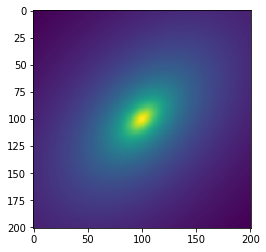

In [5]:
plt.imshow(matbeta)

In [6]:
deprate = 0.2
cavparam = {"majaxis": 30,
             "minaxis": 20,
             "theta": 165/180 * np.pi,
             "phi": 45/180 * np.pi,
             "dist": 30,
            }
angbeta = 60/180 * np.pi
matcav,rot1,rot2 = utils.genCavDepression(matbeta=matbeta, cen=cen, 
                                          cavparam=cavparam, 
                                          angbeta = angbeta,
                                          deprate=deprate)

[-21.21320344 -21.21320344]
[ 21.21320344  21.21320344]
[-13.30750929 -13.30750929]
[-29.11889759 -29.11889759]


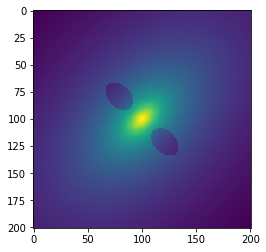

In [7]:
ax = plt.subplot(111)
ax.imshow(matcav)
# ax.invert_yaxis()

In [8]:
# generate Gaussian distributed background
matbkg = np.random.normal(0.8, 0.12, size=matshape)

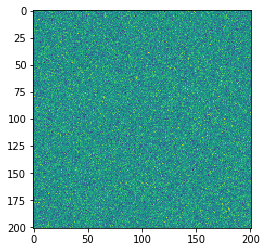

In [9]:
plt.imshow(matbkg)

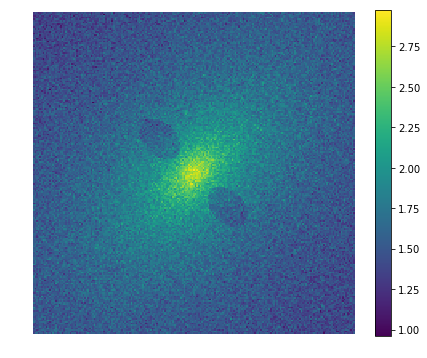

In [25]:
plt.rcParams["figure.figsize"] = [7.2, 6.0]
plt.imshow(matbkg+matcav)
plt.colorbar()
plt.axis("off")
plt.savefig("fig_2d.png",bbox_inches="tight",dpi=200)

In [11]:
matcav.sum()

33567.269963556697

In [12]:
matbkg.shape

(201, 201)

In [13]:
x = np.arange(0,200+1,1)
y = np.arange(0,200+1,1)
X,Y = np.meshgrid(x,y)

In [14]:
X.shape

(201, 201)

In [15]:
row,col,height = utils.genCavProfile(matbeta=matbeta, cen=cen, 
                              cavparam=cavparam, 
                              angbeta = angbeta,
                              deprate=deprate)

[-21.21320344 -21.21320344]
[ 21.21320344  21.21320344]
[-13.30750929 -13.30750929]
[-29.11889759 -29.11889759]


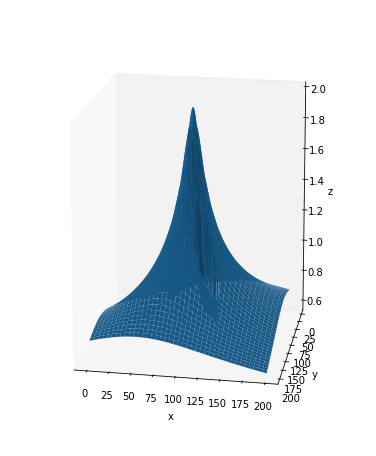

In [19]:
## Surface plot
# http://blog.csdn.net/u011276025/article/details/60883114
plt.rcParams["figure.figsize"] = [14.0, 8.0]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X,Y,matcav,facecolor='blue')
ax1.invert_xaxis()
ax1.view_init(elev=15,azim=100)
ax1.grid('off')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
# ax1.scatter3D(col,row,height,c='0',s=50)

#ax2 = fig.add_subplot(122)
#ax2.contourf(X,Y,matcav)
#ax2.invert_yaxis()
#ax2.scatter(col,row,c='r')
# ax2.view_init(elev=30,azim=-45)

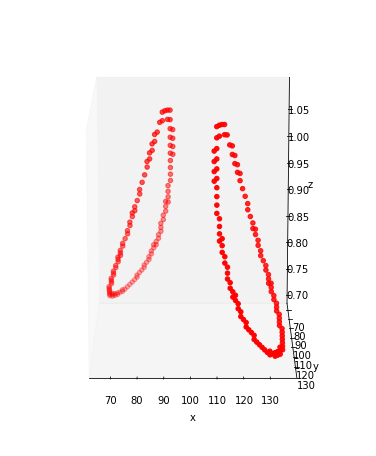

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter3D(col,row,height,c='r')
# ax1.plot_trisurf(col,row,height+0.2)
ax1.view_init(elev=15,azim=90)
ax1.grid('off')
ax1.invert_xaxis()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

In [21]:
from scipy.io import savemat

In [26]:
save_dict = {"matcav": matcav,
             "matbkp": matbkg,
             "row":row,
             "col":col,
             "height":height}
savemat("3d_demo.mat",save_dict)